In [46]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.feature_selection import mutual_info_regression

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

In [2]:
data = pd.read_csv('autos.csv')
data.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


Separate the Numerical and Categorical Features

In [3]:
num_data = data.select_dtypes(exclude = 'object')

cat_data = data.select_dtypes('object')

In [4]:
data.isnull().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [25]:
X = data.drop('price', axis = 1)
y = data.price

### MI Scores

In [6]:
X.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors           int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio      int64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
dtype: object

In [7]:
# Label Encoding the categorical features
X.select_dtypes('object')

,make,fuel_type,aspiration,body_style,drive_wheels,engine_location,engine_type,fuel_system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...
188,volvo,gas,std,sedan,rwd,front,ohc,mpfi
189,volvo,gas,turbo,sedan,rwd,front,ohc,mpfi
190,volvo,gas,std,sedan,rwd,front,ohcv,mpfi
191,volvo,diesel,turbo,sedan,rwd,front,ohc,idi


In [8]:
X['make'].factorize()

(array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
         3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
        15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20], dtype=int64),
 Index(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
        'jaguar', 'mazda', 'mercedes-be

In [10]:
len(X['make'].factorize())

2

In [11]:
X.make.value_counts(ascending=True)

mercury           1
isuzu             2
chevrolet         3
alfa-romero       3
jaguar            3
porsche           4
audi              6
saab              6
plymouth          7
bmw               8
mercedes-benz     8
dodge             8
volvo            11
peugot           11
volkswagen       12
mazda            12
subaru           12
honda            13
mitsubishi       13
nissan           18
toyota           32
Name: make, dtype: int64

In [9]:
X.factorize()

AttributeError: 'DataFrame' object has no attribute 'factorize'

In [12]:
for col in X.select_dtypes('object'):
    print(X[col][:3])

0    alfa-romero
1    alfa-romero
2    alfa-romero
Name: make, dtype: object
0    gas
1    gas
2    gas
Name: fuel_type, dtype: object
0    std
1    std
2    std
Name: aspiration, dtype: object
0    convertible
1    convertible
2      hatchback
Name: body_style, dtype: object
0    rwd
1    rwd
2    rwd
Name: drive_wheels, dtype: object
0    front
1    front
2    front
Name: engine_location, dtype: object
0    dohc
1    dohc
2    ohcv
Name: engine_type, dtype: object
0    mpfi
1    mpfi
2    mpfi
Name: fuel_system, dtype: object


In [22]:
feature_names = [col for col in X.select_dtypes('object')]
feature_names

['make',
 'fuel_type',
 'aspiration',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'fuel_system']

In [13]:
for col in X.select_dtypes('object'):
    X[col]= X[col].factorize()


ValueError: Length of values (2) does not match length of index (193)

In [26]:
for col in X.select_dtypes('object'):
    X[col], col = X[col].factorize()
    
    print(col)

X.head()

Index(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan',
       'peugot', 'plymouth', 'porsche', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')
Index(['gas', 'diesel'], dtype='object')
Index(['std', 'turbo'], dtype='object')
Index(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'], dtype='object')
Index(['rwd', 'fwd', '4wd'], dtype='object')
Index(['front', 'rear'], dtype='object')
Index(['dohc', 'ohcv', 'ohc', 'l', 'ohcf'], dtype='object')
Index(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', 'idi', 'spdi'], dtype='object')


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,94.5,171.2,...,6,152,0,2.68,3.47,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,99.8,176.6,...,4,109,0,3.19,3.40,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,99.4,176.6,...,5,136,0,3.19,3.40,8,115,5500,18,22


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    int64  
 2   fuel_type          193 non-null    int64  
 3   aspiration         193 non-null    int64  
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    int64  
 6   drive_wheels       193 non-null    int64  
 7   engine_location    193 non-null    int64  
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    int64  
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [31]:
discrete_features = X.dtypes == 'int64'
discrete_features # Decimal Numbers (float data type) are not considered Discrete

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

In [ ]:
# discrete_features = [col for col in X.columns if X[col].dtype == 'int64']

In [37]:
# Calculating the mutual information scores
mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
mi_scores

array([0.22906175, 0.54456608, 0.04812019, 0.08775535, 0.01223374,
       0.0809883 , 0.33312686, 0.03691206, 0.58799108, 0.61284858,
       0.68300115, 0.35666944, 1.49643622, 0.14999354, 0.33109581,
       0.99882471, 0.48126624, 0.50857511, 0.39322421, 0.13404075,
       1.25520983, 0.44781819, 0.85841202, 0.95690423])

In [45]:
# Convert it to a pd.Series
mi_scores = pd.Series(mi_scores, name = 'MI Scores', index = X.columns).sort_values(ascending = False)
mi_scores[:5]

highway_mpg          1.496436
city_mpg             1.255210
peak_rpm             0.998825
horsepower           0.956904
compression_ratio    0.858412
Name: MI Scores, dtype: float64

Text(0.5, 1.0, 'Mutual Information Scores')

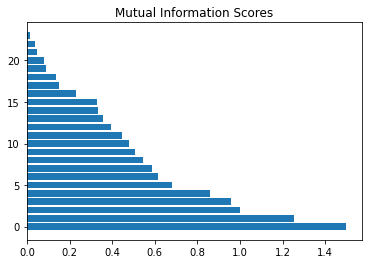

In [48]:
width = np.arange(len(mi_scores))

plt.barh(width, mi_scores)
plt.title('Mutual Information Scores')

In [50]:
# Def for making MI score
def make_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name = 'MI Score', index = X.columns).sort_values(ascending = False)
    
    return mi_scores

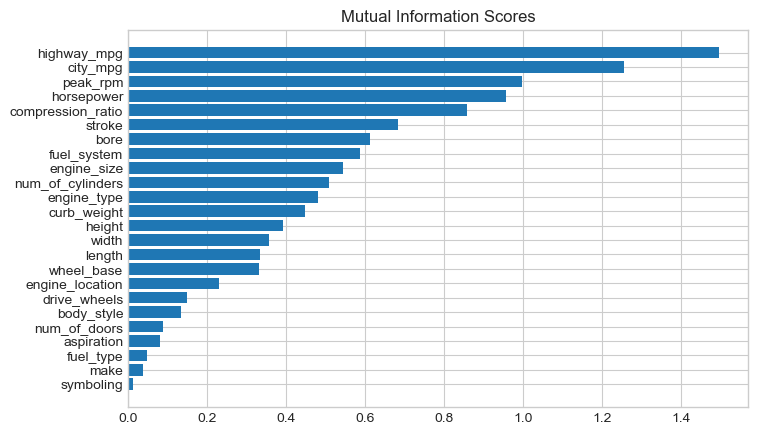

In [49]:
# Plot the scores
def plot_mi(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')

plt.style.use('seaborn-whitegrid')
plt.figure(dpi = 100, figsize=(8, 5))

plot_mi(mi_scores)

In [60]:
features = ['highway_mpg', 'city_mpg', 'peak_rpm', 'horsepower', 'compression_ratio']

X = data[features]
y = data.price

X.head()

,highway_mpg,city_mpg,peak_rpm,horsepower,compression_ratio
0,27,21,5000,111,9
1,27,21,5000,111,9
2,26,19,5000,154,9
3,30,24,5500,102,10
4,22,18,5500,115,8


In [61]:
X.describe()

,highway_mpg,city_mpg,peak_rpm,horsepower,compression_ratio
count,193.000000,193.000000,193.000000,193.000000,193.000000
mean,30.787565,25.326425,5099.740933,103.481865,9.860104
std,6.816910,6.387828,468.694369,37.960107,4.002098
min,16.000000,13.000000,4150.000000,48.000000,7.000000
25%,25.000000,19.000000,4800.000000,70.000000,8.000000
50%,30.000000,25.000000,5100.000000,95.000000,9.000000
75%,34.000000,30.000000,5500.000000,116.000000,9.000000
max,54.000000,49.000000,6600.000000,262.000000,23.000000


In [62]:
X.mean(axis=0)

highway_mpg            30.787565
city_mpg               25.326425
peak_rpm             5099.740933
horsepower            103.481865
compression_ratio       9.860104
dtype: float64

In [63]:
X.std(axis=0)

highway_mpg            6.816910
city_mpg               6.387828
peak_rpm             468.694369
horsepower            37.960107
compression_ratio      4.002098
dtype: float64

In [64]:
# Standardize them
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
X_scaled.head()

,highway_mpg,city_mpg,peak_rpm,horsepower,compression_ratio
0,-0.555613,-0.677292,-0.212806,0.198054,-0.214913
1,-0.555613,-0.677292,-0.212806,0.198054,-0.214913
2,-0.702307,-0.990387,-0.212806,1.330822,-0.214913
3,-0.115531,-0.207649,0.853987,-0.039037,0.034956
4,-1.289083,-1.146935,0.853987,0.303427,-0.464782


## Creating Principal Components

In [58]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA()

X_pca = pca.fit_transform(X_scaled)

X_pca[:10]

array([[-0.8355747 ,  0.22792607, -0.27009364, -0.25294628, -0.1051755 ],
       [-0.8355747 ,  0.22792607, -0.27009364, -0.25294628, -0.1051755 ],
       [-1.69912694,  0.43793952,  0.00344903,  0.47745215, -0.17282159],
       [-0.24758298, -0.56576919,  0.56178744, -0.29497591, -0.06706455],
       [-1.75129554, -0.51299815,  0.24479008, -0.78658415,  0.07576983],
       [-1.34467209, -0.62743542,  0.2228898 , -0.64199814, -0.11318945],
       [-1.34467209, -0.62743542,  0.2228898 , -0.64199814, -0.11318945],
       [-1.34467209, -0.62743542,  0.2228898 , -0.64199814, -0.11318945],
       [-2.3555404 , -0.35682674,  0.40132215, -0.44600317,  0.19543765],
       [-0.60062357, -1.30934547,  0.60525779, -0.45785201, -0.053139  ]])

In [68]:
X_pca.shape

(193, 5)

In [70]:
# To DataFrame
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
component_names

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

In [71]:
X_pca = pd.DataFrame(X_pca, columns = component_names)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.835575,0.227926,-0.270094,-0.252946,-0.105176
1,-0.835575,0.227926,-0.270094,-0.252946,-0.105176
2,-1.699127,0.437940,0.003449,0.477452,-0.172822
3,-0.247583,-0.565769,0.561787,-0.294976,-0.067065
4,-1.751296,-0.512998,0.244790,-0.786584,0.075770


In [72]:
# PCA instance contains the loadings
pca.components_

array([[ 0.56116393,  0.57286081, -0.10924119, -0.53132914,  0.25036223],
       [-0.17850624, -0.12072923, -0.73585536,  0.12891242,  0.62885487],
       [ 0.01546453,  0.02800969,  0.64885708,  0.25122611,  0.71752787],
       [ 0.44573417,  0.34092789, -0.15933232,  0.79674552, -0.15779418],
       [-0.67402705,  0.73500924,  0.01345193,  0.05615113, -0.04598968]])